In [1]:
import requests
import base64
import json

from PIL import Image
from requests_toolbelt import MultipartEncoder

## Set sample image

In [2]:
image_path = "../petfinder/data/raw/train/0d327ff78570bada703f8855d983712b.jpg"
# image_path = "../petfinder/data/raw/train/0365920c849af714930d75e7727c5165.jpg"

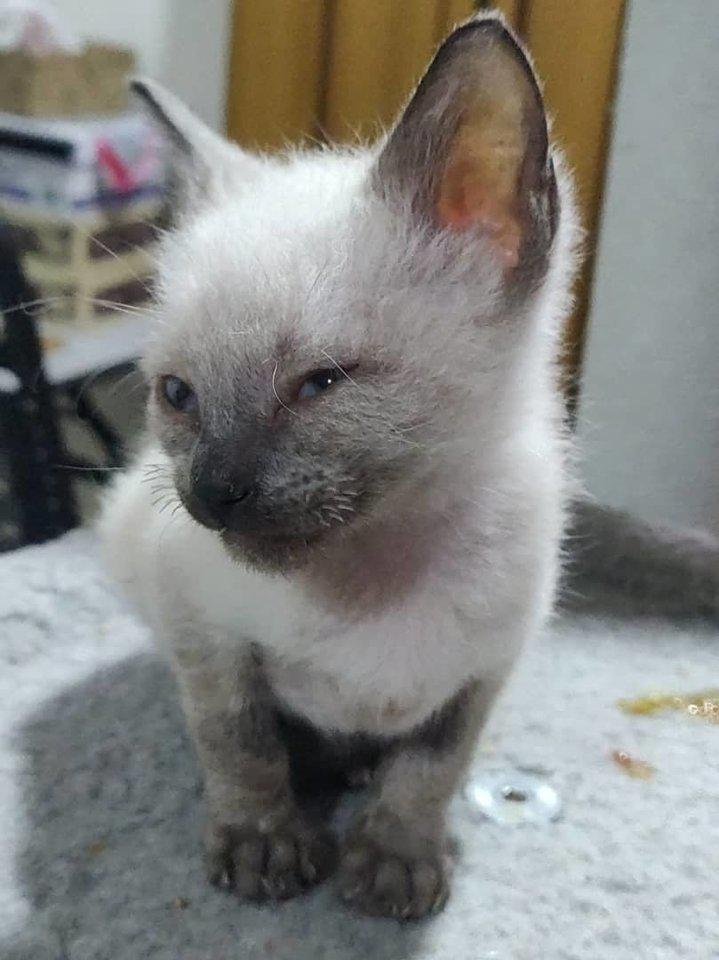

In [3]:
image = Image.open(image_path)
image

## Test `predict_text` endpoint

In [4]:
endpoint = "http://0.0.0.0:3000/predict_text"
# endpoint = "https://youjin2-pet-pawpularity.herokuapp.com/predict_text"

In [5]:
with open(image_path, "rb") as f:
    image_buffer = f.read()

In [6]:
response = requests.post(
    endpoint,
    data=base64.b64encode(image_buffer),
    headers={"content-type": "text/plain"},
)

print(f"status code: {response.status_code}")
print(f"prediction result: {json.loads(response.text)}")

status code: 200
prediction result: [36.45669937133789]


## Test `predict_image` endpoint

In [7]:
endpoint = "http://0.0.0.0:3000/predict_image"
# endpoint = "https://youjin2-pet-pawpularity.herokuapp.com/predict_image"

In [8]:
response = requests.post(
    endpoint,
    data=open(image_path, "rb"),
    headers={"content-type": "image/jpeg"}
)

print(f"status code: {response.status_code}")
print(f"prediction result: {json.loads(response.text)}")

status code: 200
prediction result: [36.408897399902344]


In [9]:
encoder = MultipartEncoder(
    fields={"image_file": ("image", open(image_path, "rb"), "image/jpeg"),}
)

In [10]:
response = requests.post(
    endpoint,
    data=encoder.to_string(),
    headers={"content-type": encoder.content_type,}
)

print(f"status code: {response.status_code}")
print(f"prediction result: {json.loads(response.text)}")

status code: 200
prediction result: [36.408897399902344]


```bash
$ curl -X 'POST' \
    'http://localhost:12000/predict_image' \
    -H 'Content-Type: multipart/form-data' \
    -F 'fileobj=@petfinder/data/raw/train/0d327ff78570bada703f8855d983712b.jpg;type=image/jpeg'


$ curl -X 'POST' \
    'http://localhost:12000/predict_image' \
    -H 'accept: application/json' \
    -H 'Content-Type: image/jpeg' \
    --data-binary '@petfinder/data/raw/train/0d327ff78570bada703f8855d983712b.jpg'
```